In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as stat
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm
import pandas.plotting as pd_plot
import scipy as sc
from pandas import DataFrame
import statsmodels.api as sm
from bioinfokit.analys import stat
import seaborn as sns


In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

## Exercise 6.3
Twenty-two patients undergoing cardiac bypass surgery were randomized to one out of
three ventilation groups (Amess et al., Lancet 1978). The red cell folate levels (µg/l) after
24 hours in three groups of cardiac bypass patients given different levels of nitrous oxide
ventilation are found in folate.dta

In [3]:
folate = pd.read_csv('data/folate.csv', sep=',', decimal=".")
print(folate)

    folate                     group
0      243        NO and O2 for 24 h
1      251        NO and O2 for 24 h
2      275        NO and O2 for 24 h
3      291        NO and O2 for 24 h
4      347        NO and O2 for 24 h
5      354        NO and O2 for 24 h
6      380        NO and O2 for 24 h
7      392        NO and O2 for 24 h
8      206   NO during the operation
9      210   NO during the operation
10     226   NO during the operation
11     249   NO during the operation
12     255   NO during the operation
13     273   NO during the operation
14     285   NO during the operation
15     295   NO during the operation
16     309   NO during the operation
17     241                     - NO 
18     258                     - NO 
19     270                     - NO 
20     293                     - NO 
21     328                     - NO 


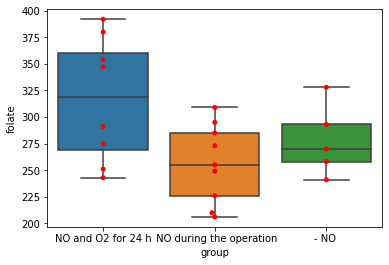

In [4]:
%matplotlib inline

fig, ax = plt.subplots(1, 1)
ax = sns.boxplot(x='group', y='folate', data=folate)
ax = sns.swarmplot(x='group', y='folate', data=folate, color='red')
plt.show()

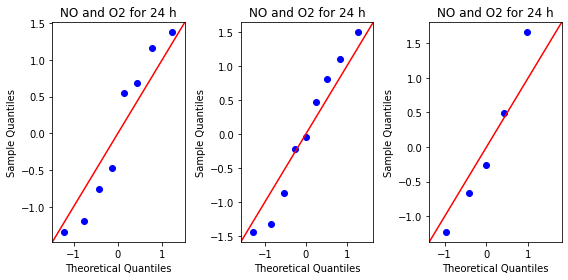

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 3, 1)
sm.graphics.qqplot(folate['folate'].loc[folate['group'] == 'NO and O2 for 24 h'], ax=ax1, fit=True, line='45')
ax1.set_title('NO and O2 for 24 h')

ax2 = fig.add_subplot(1, 3, 2)
sm.graphics.qqplot(folate['folate'].loc[folate['group'] == ' NO during the operation'], ax=ax2, fit=True, line='45')
ax2.set_title('NO and O2 for 24 h')

ax3 = fig.add_subplot(1, 3, 3)
sm.graphics.qqplot(folate['folate'].loc[folate['group'] == '- NO '], ax=ax3, fit=True, line='45')
ax3.set_title('NO and O2 for 24 h')

plt.tight_layout()
plt.show()


In [6]:
folate['log_folate'] = np.log(folate['folate'])

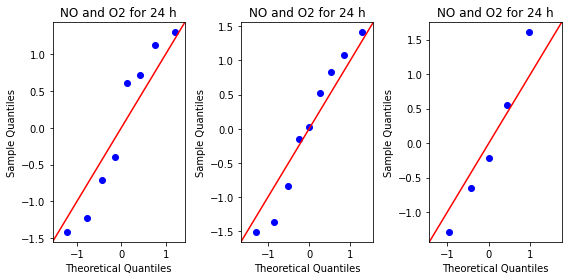

The log-transformed distribution doesnt look better. So we will stick with the raw data.


In [11]:
%matplotlib inline
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 3, 1)
sm.graphics.qqplot(folate['log_folate'].loc[folate['group'] == 'NO and O2 for 24 h'], ax=ax1, fit=True, line='45')
ax1.set_title('NO and O2 for 24 h')

ax2 = fig.add_subplot(1, 3, 2)
sm.graphics.qqplot(folate['log_folate'].loc[folate['group'] == ' NO during the operation'], ax=ax2, fit=True, line='45')
ax2.set_title('NO and O2 for 24 h')

ax3 = fig.add_subplot(1, 3, 3)
sm.graphics.qqplot(folate['log_folate'].loc[folate['group'] == '- NO '], ax=ax3, fit=True, line='45')
ax3.set_title('NO and O2 for 24 h')

plt.tight_layout()
plt.show()


print('The log-transformed distribution doesnt look better. So we will stick with the raw data.')


In [12]:
print('Now we do a Bartlett test, to see if the hypothesis of equal variances hold ')

print(stats.bartlett(folate['folate'].loc[folate['group'] == 'NO and O2 for 24 h'], 
                     folate['folate'].loc[folate['group'] == ' NO during the operation'], 
                     folate['folate'].loc[folate['group'] == '- NO ']))

Now we do a Bartlett test, to see if the hypothesis of equal variances hold 
BartlettResult(statistic=2.095059428100749, pvalue=0.3508032640105389)


* We find a p-value of 0.35. Therefore, we can assume that the standard deviations of the log-transformed survival times are equal. With the additional assumption of independent measurements and that each group follows a normal distribution, we can do the ANOVA analysis:

In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

folate_lm = ols('folate ~ C(group, Treatment(reference=" NO during the operation"))', data=folate).fit()
table = anova_lm(folate_lm)
print(table, '\n')

print(folate_lm.model.data.orig_exog, '\n')
print(folate_lm.summary())


NameError: name 'folate' is not defined

The mean folate value for the group that received 'NO during during the operation' was 256.44 (95% CI 224.54, 288.34). The folate level was higher 'NO and O2 for 24 h' group by 60.18 (95% CI 13.68,   106.68). The change was smaller for the 'no NO' group, by 21.55 (95% CI -31.820, 74.931); the confidence interval going over 0 means that there isn't necessarily a statisticall significance between the groups)

In [26]:
print('- NO:', 256.44 +60.18, '95% CI: ', np.sqrt(224.54**2 + 13.68**2), np.sqrt(106.68**2 + 288.34**2))

- NO: 316.62 95% CI:  224.95633798584115 307.4419912764032


In [ ]:
Additionally, we can do a Tukey test:

In [42]:
tukey_stats = sm.stats.multicomp.pairwise_tukeyhsd(endog=folate['folate'], 
                                                   groups=folate['group'], alpha=0.05)
print(tukey_stats)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
         group1                group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
 NO during the operation              - NO   21.5556 0.6706 -43.2141  86.3252  False
 NO during the operation NO and O2 for 24 h  60.1806 0.0354   3.7555 116.6056   True
                   - NO  NO and O2 for 24 h   38.625 0.3217 -27.5746 104.8246  False
------------------------------------------------------------------------------------
